# ASL alphabet 
---

In [2]:
from fastai2.vision.all import *

## Data

In [3]:
path = Path('data/')
Path.BASE_PATH = path
path.ls()

(#2) [Path('asl_alphabet_train'),Path('asl_alphabet_test')]

In [4]:
files = get_image_files(path/'asl_alphabet_train')
files

(#87000) [Path('asl_alphabet_train/K/K625.jpg'),Path('asl_alphabet_train/K/K1945.jpg'),Path('asl_alphabet_train/K/K2616.jpg'),Path('asl_alphabet_train/K/K2697.jpg'),Path('asl_alphabet_train/K/K1167.jpg'),Path('asl_alphabet_train/K/K120.jpg'),Path('asl_alphabet_train/K/K1615.jpg'),Path('asl_alphabet_train/K/K497.jpg'),Path('asl_alphabet_train/K/K200.jpg'),Path('asl_alphabet_train/K/K1545.jpg')...]

## DataLoaders

In [5]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(seed=42),
                   item_tfms=Resize(128),
                   batch_tfms=aug_transforms(size=64, min_scale=0.75))

In [6]:
dls = dblock.dataloaders(path/'asl_alphabet_train', bs=256)

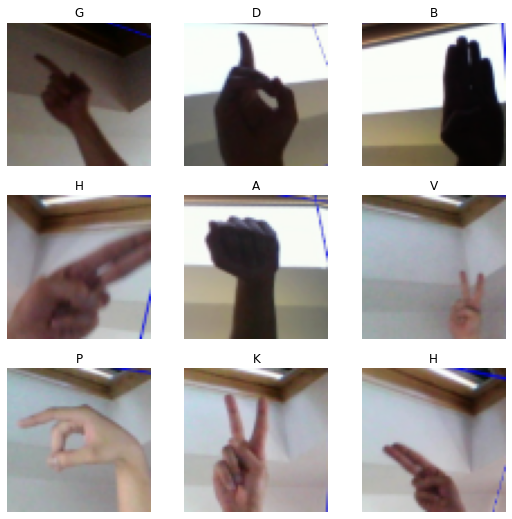

In [7]:
dls.show_batch()

## Model

In [8]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy])

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.02290867641568184)

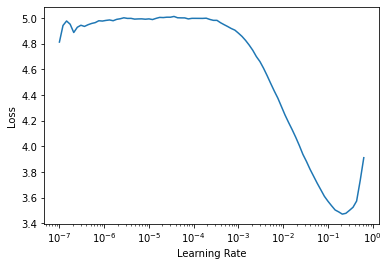

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(5, 2e-2, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.109310,1.124365,0.353621,0.646379,03:20
1,0.512864,0.435596,0.143966,0.856034,00:26
2,0.307967,0.184518,0.063046,0.936954,00:26


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.166116,0.119424,0.038276,0.961724,00:29
1,0.109226,0.045107,0.015402,0.984598,00:29
2,0.055966,0.054726,0.014885,0.985115,00:29
3,0.020289,0.010652,0.003103,0.996897,00:29
4,0.009226,0.006318,0.002069,0.997931,00:29


In [11]:
learn.save('r18')